# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The dataset that I have chosen is the Airbnb NYC listings data set.
2. I will predict the price of a listing per night.
3. This is a supervised learning problem because we have historical data with known prices. It is a regression problem because the label (price) is a continuous numeric value.
4. Some initial features include, neighbourhood_overview, host_is_superhost, host_listings_count, host_response_rate, host_acceptance_rate, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes.
5. Predicting the price of an Airbnb listing is useful because it helps everyone using the platform. Hosts can use this information to set fair and competitive prices for their listings, which can help them get more bookings and earn more money. Airbnb can also suggest better prices to hosts, making the whole platform work more smoothly and increasing the number of stays booked. Guests benefit too, because they can find listings that are fairly priced and fit their budget. Overall, having a good price prediction model makes the platform better and more balanced for hosts, guests, and Airbnb itself.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview    host_name  \
0  Centrally located in the heart of Manhattan ju...     Jennifer   
1  Just the right mix of urban center and local n...  LisaRoxanne   
2                                                NaN      Rebecca   
3    Theater district, many restaurants around her

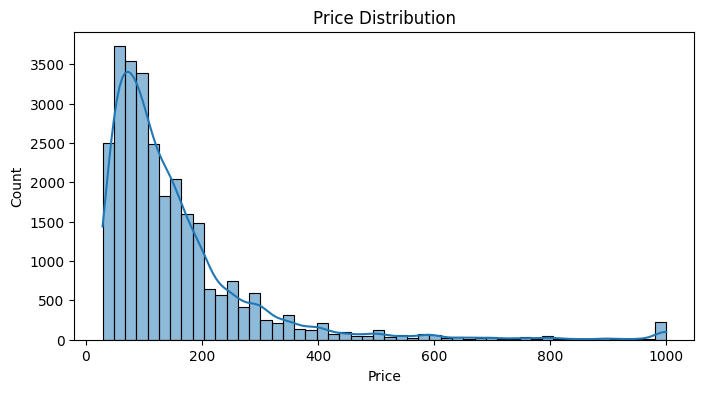

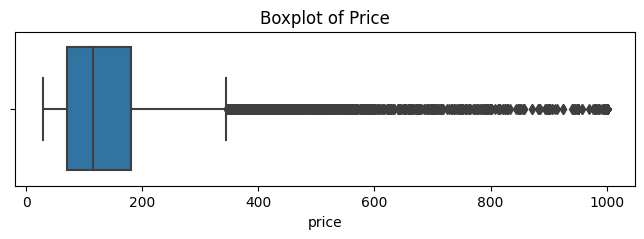

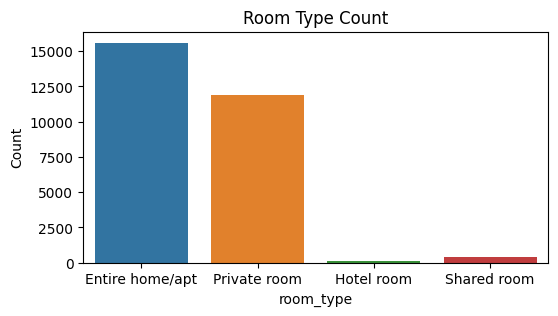

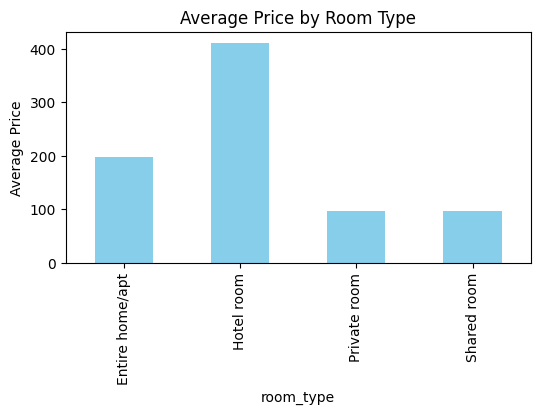

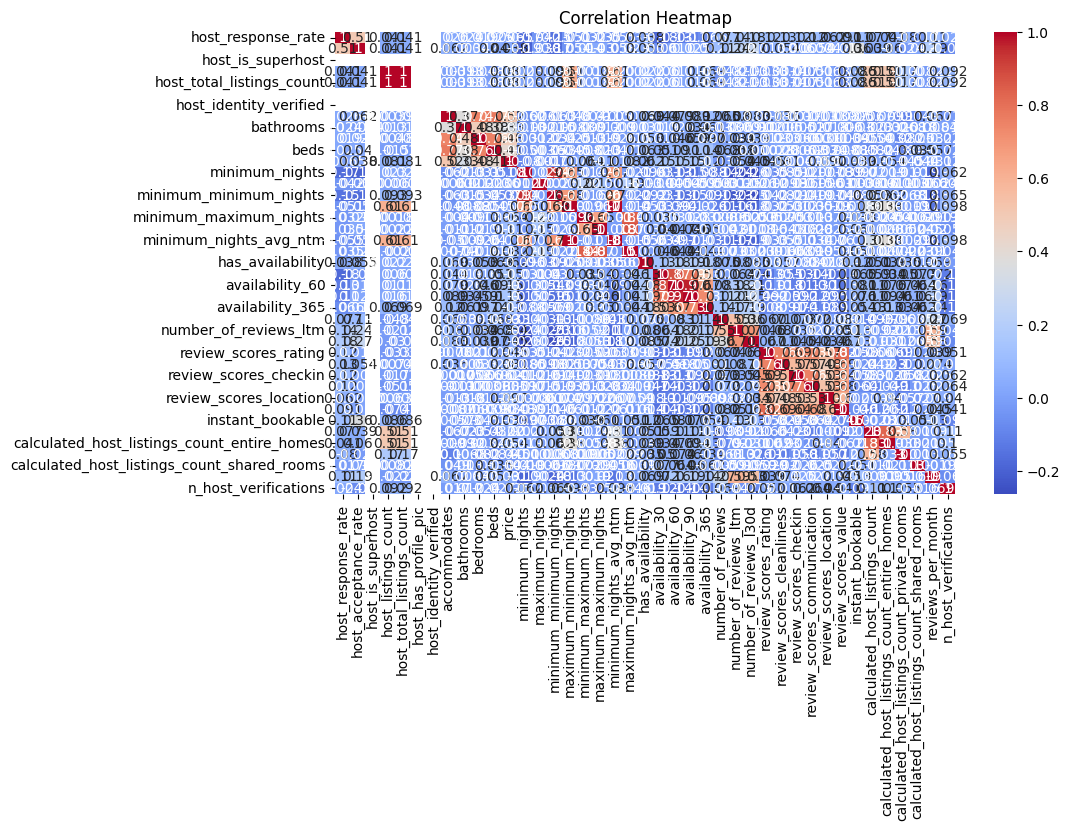

In [3]:
# YOUR CODE HERE
# Display first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe(include='all'))

# Histogram of price
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Boxplot to see price outliers
plt.figure(figsize=(8,2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

# Room type counts
plt.figure(figsize=(6,3))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Count')
plt.ylabel('Count')
plt.show()

# Average price by room type
plt.figure(figsize=(6,3))
df.groupby('room_type')['price'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After exploring the data, I updated my list of features to include only the columns that are useful for predicting price. I plan to keep features like room_type, neighbourhood_group_cleansed, number_of_reviews, reviews_per_month, host_is_superhost, host_listings_count, minimum_nights, availability_365, review_scores_rating, and accommodates. I will remove text fields like name, description, and host_about because they are hard to use directly and may not add much value to the prediction.

For data preparation, I will use several techniques to get the data ready for modeling. I will fill missing numeric values, like host_response_rate or host_acceptance_rate, with the mean or median. For categorical variables like room_type and neighbourhood_group_cleansed, I will use one-hot encoding to turn them into numeric columns. I will also scale numeric features so they are on a similar range, which can help some models perform better. Finally, I will check for extreme outliers in the price column and remove or adjust them to reduce their impact on the model.

For the modeling part, I plan to start with a Linear Regression model because it is simple and helps me understand how the features relate to price. Then, I will try using a Random Forest Regressor to see if it can improve accuracy by capturing more complex patterns in the data. To train and evaluate the models, I will split the data into training and testing sets, train the models on the training data, and check performance on the test set using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). I will also use cross-validation to make sure the model generalizes well to new data. If the model doesn’t perform well, I will experiment by tuning hyperparameters, adding or removing features, and testing other algorithms to improve the results.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
# YOUR CODE HERE
# Select features and label (based on your plan)
features = [
    'room_type', 'neighbourhood_group_cleansed', 'number_of_reviews',
    'reviews_per_month', 'host_is_superhost', 'host_listings_count',
    'minimum_nights', 'availability_365', 'review_scores_rating', 'accommodates'
]
label = 'price'

# Drop rows with missing price or label data if any
df = df.dropna(subset=[label])

# Remove outliers in price (optional but recommended)
q_low = df[label].quantile(0.01)
q_high = df[label].quantile(0.99)
df = df[(df[label] > q_low) & (df[label] < q_high)]

# Split data into features and target
X = df[features]
y = df[label]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and categorical columns
numeric_features = [
    'number_of_reviews', 'reviews_per_month', 'host_listings_count',
    'minimum_nights', 'availability_365', 'review_scores_rating', 'accommodates'
]
categorical_features = ['room_type', 'neighbourhood_group_cleansed', 'host_is_superhost']

# --- Data Preparation ---

# 1. Impute missing numeric values with mean
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[numeric_features])
X_test_num = num_imputer.transform(X_test[numeric_features])

# 2. Scale numeric features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# 3. Impute missing categorical values with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

# 4. One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)

# 5. Combine numeric and categorical processed features
X_train_prepared = np.hstack([X_train_num_scaled, X_train_cat_enc])
X_test_prepared = np.hstack([X_test_num_scaled, X_test_cat_enc])

# --- Modeling and Evaluation ---

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_prepared, y_train)

y_pred_lr = lr_model.predict(X_test_prepared)

print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_prepared, y_train)

y_pred_rf = rf_model.predict(X_test_prepared)

print("\nRandom Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

Linear Regression Performance:
MAE: 56.47
RMSE: 88.93

Random Forest Performance:
MAE: 48.84
RMSE: 79.77
